In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data_noise = pd.read_csv('../../NumericDataSet/20_noisy_clean_adult.csv')
data_noise.head()

,workclass_num,education.num,marital_num,race_num,sex_num,rel_num,capital.gain,capital.loss,workclass,fnlwgt,...,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,age,over50K
0,0,9,0,0,0,0,0,4356,Private,132870,...,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K,82,0
1,0,6,2,0,1,0,0,404,Private,140359,...,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K,54,0
2,0,10,2,0,1,1,0,3900,Private,264663,...,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K,41,0
3,0,9,1,2,0,0,58151,3770,Private,216864,...,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K,34,0
4,2,6,2,0,1,0,0,3770,Private,150601,...,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K,38,0


In [3]:
data = pd.read_csv('../../NumericDataSet/clean_adult.csv')
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,...,capital.loss,hours.per.week,native.country,income,workclass_num,marital_num,race_num,sex_num,rel_num,over50K
0,1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,...,4356,18,United-States,<=50K,0,0,0,0,0,0
1,3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,...,3900,40,United-States,<=50K,0,1,0,0,0,0
2,4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,...,3900,40,United-States,<=50K,0,2,0,0,0,0
3,5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,...,3770,45,United-States,<=50K,0,1,0,0,0,0
4,6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,...,3770,40,United-States,<=50K,0,2,0,1,0,0


In [4]:
# TODO: Total number of records
n_records = len(data_noise)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data_noise.query('income == ">50K"'))

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data_noise.query('income == "<=50K"'))

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (float(n_greater_50k) / n_records * 100)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 30718
Individuals making more than $50,000: 7650
Individuals making at most $50,000: 23068
Percentage of individuals making more than $50,000: 24.90%


In [5]:
# Drop this column since it is not a significant feature to build our model prediction
data_noise.drop(labels='fnlwgt',axis=1,inplace=True)

In [6]:
# Drop this column since it is not a significant feature to build our model prediction
data.drop(labels='fnlwgt',axis=1,inplace=True)

In [7]:
data_noise[data_noise.isnull()].count()

workclass_num     0
education.num     0
marital_num       0
race_num          0
sex_num           0
rel_num           0
capital.gain      0
capital.loss      0
workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
age               0
over50K           0
dtype: int64

In [8]:
X_noise = data_noise[['workclass_num', 'education.num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]
y_noise = data_noise.over50K

In [9]:
X = data[['workclass_num', 'education.num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]
y = data.over50K

In [10]:
# create a base classifier used to evaluate a subset of attributes
logreg = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(logreg, 3)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False  True False False  True  True False False]
[4 1 2 3 1 1 6 5]


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


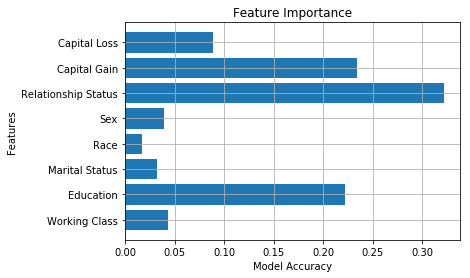

In [11]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(8) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Working Class', 'Education', 'Marital Status', 'Race', 'Sex', 'Relationship Status', 'Capital Gain', 'Capital Loss'))
plt.grid(True)

In [12]:
# Drop the data you don't want to use
data_noise.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(data_noise.head())

Dataset with Dropped Labels
   workclass_num  education.num  marital_num  race_num  sex_num  rel_num  \
0              0              9            0         0        0        0   
1              0              6            2         0        1        0   
2              0             10            2         0        1        1   
3              0              9            1         2        0        0   
4              2              6            2         0        1        0   

   capital.gain  capital.loss marital.status     sex  hours.per.week income  \
0             0          4356        Widowed  Female              18  <=50K   
1             0           404       Divorced  Female              40  <=50K   
2             0          3900      Separated  Female              40  <=50K   
3         58151          3770       Divorced  Female              45  <=50K   
4             0          3770      Separated    Male              40  <=50K   

   age  over50K  
0   82        0  
1   

In [13]:
# Drop the data you don't want to use
data.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(data.head())

Dataset with Dropped Labels
   Unnamed: 0  age  education.num marital.status     sex  capital.gain  \
0           1   82              9        Widowed  Female             0   
1           3   54              4       Divorced  Female             0   
2           4   41             10      Separated  Female             0   
3           5   34              9       Divorced  Female             0   
4           6   38              6      Separated    Male             0   

   capital.loss  hours.per.week income  workclass_num  marital_num  race_num  \
0          4356              18  <=50K              0            0         0   
1          3900              40  <=50K              0            1         0   
2          3900              40  <=50K              0            2         0   
3          3770              45  <=50K              0            1         0   
4          3770              40  <=50K              0            2         0   

   sex_num  rel_num  over50K  
0        0     

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_noise, y_noise, random_state=13)

In [15]:
from sklearn.model_selection import train_test_split
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, random_state=13)

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('SVM', SVC()))
# evalutate each model in turn
#results = []
#names = []
#for name, model in models:
 #   kfold = KFold(n_splits=10, random_state=0)
  #  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   # results.append(cv_results)
   # names.append(name)
   # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   # print(msg)

In [18]:
#Trial with type 2
# Evaluate each model in turn
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
train_results = []
test_results = []
names = []
for name, model in models:
    cv_train_results = cross_val_score(model, X_train, y_train, 
                                       cv=10, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(X_train, y_train)
    cv_test_results = accuracy_score(y_test_original, clf.predict(X_test_original))
    test_results.append(cv_test_results)
    names.append(name)
    f1_test = f1_score(y_test_original, clf.predict(X_test_original), average='weighted')
    result = "%s: %f (%f) %f" % (name, cv_train_results.mean(), cv_train_results.std(), 
                                cv_test_results)
    print(result)
    print (f1_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR: 0.749934 (0.005126) 0.758594
0.6544598234118169
LDA: 0.775720 (0.008880) 0.807813
0.7877594547498039
KNN: 0.770639 (0.007292) 0.835677
0.8206048189798717
CART: 0.758965 (0.008079) 0.839974
0.8303182281992371
NB: 0.762827 (0.006966) 0.774349
0.7006720158926742
RF: 0.787527 (0.007288) 0.837891
0.8275936372367277


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

SVM: 0.788133 (0.005834) 0.851953
0.8411743459382789
